In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df= pd.read_csv('USA_Housing.csv')

In [16]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [17]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', ]]
y=df['Price']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101)


In [19]:
#importing linear regression 
from sklearn.linear_model import LinearRegression
#creating an instance of the linear regression model
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
print(lm.intercept_)

6.984919309616089e-10


In [21]:
lm.coef_

array([ 6.10933732e-15, -5.02164976e-11, -9.73883628e-12, -4.71580474e-12,
        1.04083409e-17,  1.00000000e+00])

In [22]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [23]:
'''This line of code creates a pandas
DataFrame (cdf) with a 
single column named 'Coeff'.
The data in this column is th
e list of coefficients (lm.coef_)
from your linear regression model (lm). 
The index (row labels) of the DataFrame is set to
the column names of the DataFrame X (X.columns). 
This way, each row of the DataFrame cdf will 
contain the coefficient corresponding to each 
independent variable in the model.'''
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [24]:
cdf

,Coeff
Avg. Area Income,6.109337e-15
Avg. Area House Age,-5.021650e-11
Avg. Area Number of Rooms,-9.738836e-12
Avg. Area Number of Bedrooms,-4.715805e-12
Area Population,1.040834e-17
Price,1.000000e+00


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



Predictions


In [25]:
'''It uses the trained linear regression model (lm) to predict the dependent variable values for the input test dataset (X_test).
The predict method computes the predicted values based on the linear relationship established by the trained model between the independent variables (features) and the dependent variable.
The predicted values are stored in the variable predictions.'''
predictions=lm.predict(X_test)

In [26]:
predictions

array([1251688.61570287,  873048.31964236, 1696977.6628326 , ...,
        151527.08262656, 1343824.21514432, 1906024.63648501])

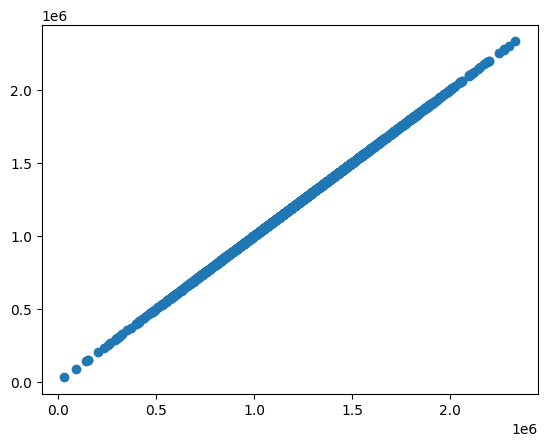

In [27]:
'''y_test: This is an array-like structure (such as a pandas Series or a numpy array) that contains the actual target values (the dependent variable) from your test dataset. This is the ground truth that you will use to evaluate the predictions made by your linear regression model (lm).

predictions: This is an array-like structure (such as a pandas Series or a numpy array) containing the predicted values for the target variable, as calculated by the linear regression model (lm) using the test dataset (X_test).

plt.scatter(y_test, predictions): This line of code creates a scatter plot using matplotlib. The function plt.scatter plots the values of y_test (on the x-axis) against predictions (on the y-axis). This type of plot helps you visualize the relationship between the actual and predicted values.

By plotting a scatter plot of the actual vs. predicted values, you can assess how well the model's predictions match the ground truth:

If the model's predictions are perfect, the scatter plot will show a straight line where the actual values (y_test) are equal to the predicted values (predictions). In other words, the points will lie on the diagonal line with a slope of 1 and intercept of 0.

Deviations from this line indicate differences between the actual and predicted values. If the points are scattered far from the line, it suggests the model's predictions are not very accurate.'''
y_test
plt.scatter(y_test,predictions)

c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


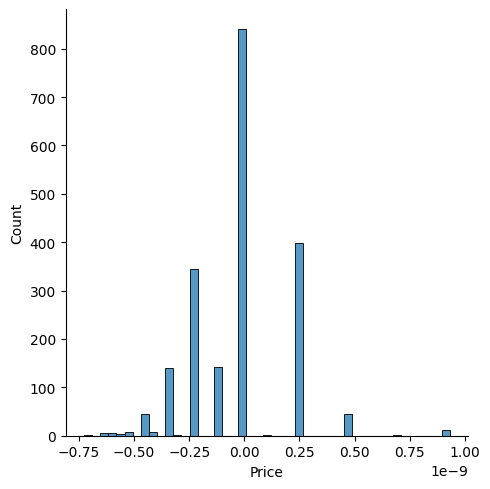

In [28]:
sns.displot(y_test-predictions)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [29]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.539519871585071e-10
MSE: 4.907804187597982e-20
RMSE: 2.2153564470752742e-10
